In [404]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [405]:
# Upload data games
df=pd.read_csv('vgsales.csv')

## Assessing data

In [406]:
df.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [407]:
#check for any null values in each column
list_col=list(df.columns)
for col in list_col:
    n=df[col].isnull().sum()
    print(str(col)+':'+str(n))


Rank:0
Name:0
Platform:0
Year:271
Genre:0
Publisher:58
NA_Sales:0
EU_Sales:0
JP_Sales:0
Other_Sales:0
Global_Sales:0


In [408]:
df.shape

(16598, 11)

In [409]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [410]:
df.duplicated().sum()

0

In [411]:
name_df=df.Name.duplicated().sum()
name_df


5105

In [412]:
# total unique games
df.shape[0]-name_df

11493

## Cleaning time

In [413]:
# make sure that global sales is sum of those columns
condition=(df.Global_Sales==df.NA_Sales +df.EU_Sales +df.JP_Sales)
if condition.any():
    df.Global_Sales=df.NA_Sales +df.EU_Sales +df.JP_Sales 


In [414]:
# test the code
condition=(df.Global_Sales==df.NA_Sales +df.EU_Sales +df.JP_Sales)
condition

0        True
1        True
2        True
3        True
4        True
         ... 
16593    True
16594    True
16595    True
16596    True
16597    True
Length: 16598, dtype: bool

In [415]:
# to convert year column to int type , first i have to deal with all nan values which contain that column.
# will replace NAN values with 0
df.Year=df.Year.fillna(0)

In [416]:
# convert year column type from float to int.
df.Year=pd.to_numeric(df.Year)
df.Year=df.Year.astype(int)

In [417]:
#to test the code
df.dtypes

Rank              int64
Name             object
Platform         object
Year              int32
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Analysis time
* __Questions__
* Total sales for each platform [the top three , and the lowest one]
* Line chart for the top platform to show the distribution of years for sales
* for each platform the most popular genre and it's total sales
* the top genre in total sales
* _IN GENERAL_ top and lowest year in sales
* the most popular game
* the order of games 
* for each year the most popular game

In [418]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,74.28
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,39.47


##  Total sales for each platform [the top three , and the lowest one]


In [419]:
# Total sales for each platform [the top three , and the lowest one]
df_total=df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
df_total

Platform
PS2     1062.33
X360     894.06
Wii      845.44
PS3      815.96
DS       760.93
PS       689.93
GBA      310.12
PSP      254.03
XB       249.02
GB       247.26
NES      245.74
PS4      234.80
3DS      234.74
PC       233.13
N64      214.30
SNES     196.82
GC       193.75
XOne     129.18
2600      96.07
WiiU      75.34
PSV       53.49
SAT       33.52
GEN       27.46
DC        15.68
SCD        1.81
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

### Top three are [PS2, X360 ,Wii]
### Lowest one is [PCFX]

## ____________________________________________________________________
## second:
## scatter chart for the top platform to show the distribution of years for sales


In [420]:
df_ps2=df[df['Platform']== 'PS2']
ps2=df_ps2.groupby('Year')['Global_Sales'].sum()
ps2

Year
0        19.24
2000     35.59
2001    149.65
2002    183.66
2003    163.62
2004    171.96
2005    141.51
2006     89.18
2007     52.30
2008     34.59
2009     16.24
2010      4.44
2011      0.35
Name: Global_Sales, dtype: float64

In [421]:
ps2=pd.DataFrame(ps2.reset_index())
ps2

,Year,Global_Sales
0,0,19.24
1,2000,35.59
2,2001,149.65
3,2002,183.66
4,2003,163.62
5,2004,171.96
6,2005,141.51
7,2006,89.18
8,2007,52.30
9,2008,34.59


Text(0.5, 1.0, 'Distribution of the total sales for years for PS2')

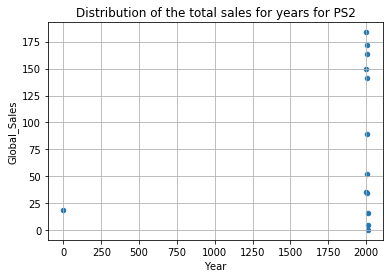

In [422]:
ps2.plot(x ='Year', y='Global_Sales', kind = 'scatter')
#plt.xticks(ps2.Year)
#plt.yticks(ps2.Global_Sales)
plt.grid(True)
plt.title("Distribution of the total sales for years for PS2")

## 3- for each paltform the most popular genre and the total sales for it

In [423]:
# for each paltform the most popular genre and the total sales for it
platform_genre=df.groupby(['Platform','Genre'])['Global_Sales'].sum()
platform_genre=pd.DataFrame(platform_genre.reset_index())
platform_genre

,Platform,Genre,Global_Sales
0,2600,Action,29.03
1,2600,Adventure,1.69
2,2600,Fighting,1.23
3,2600,Misc,3.54
4,2600,Platform,13.10
...,...,...,...
288,XOne,Role-Playing,8.63
289,XOne,Shooter,47.21
290,XOne,Simulation,0.49
291,XOne,Sports,21.95


In [424]:
# From this query we see the most popular genre for each platform according to the total sales from it .
highest_in=platform_genre.groupby('Platform')['Genre','Global_Sales'].max()
highest_in=pd.DataFrame(highest_in.reset_index())
highest_in

C:\Users\ENTER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Platform,Genre,Global_Sales
0,2600,Sports,29.03
1,3DO,Simulation,0.06
2,3DS,Strategy,72.79
3,DC,Sports,3.61
4,DS,Strategy,127.97
5,GB,Strategy,84.93
6,GBA,Strategy,75.94
7,GC,Strategy,36.71
8,GEN,Strategy,14.88
9,GG,Platform,0.04


##  4-The top genre in total global sales 

In [425]:
# The top genre in total global sales 
general_top_genre=df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
general_top_genre

Genre
Action          1562.78
Sports          1195.57
Shooter          934.15
Role-Playing     867.65
Platform         779.45
Misc             733.98
Racing           654.50
Fighting         412.26
Simulation       360.39
Puzzle           231.87
Adventure        222.00
Strategy         163.50
Name: Global_Sales, dtype: float64

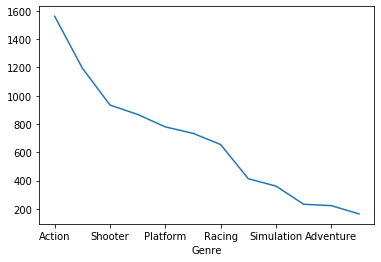

In [426]:
# top Genre [action, sports, shooter]
# the lowest [strategy]
general_top_genre.plot()

## 5-top year and lowest one in sales

In [427]:
# top year and lowest one
# top year in sales [2008]
# the lowest two years in sales [2020 , 2017]
df.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False)

Year
2008    596.10
2009    592.33
2010    540.46
2007    532.84
2006    466.09
2011    461.54
2005    418.83
2004    371.56
2002    367.69
2003    331.60
2013    328.16
2012    325.48
2001    308.73
2014    297.08
1998    245.30
1999    241.07
2015    234.25
1997    191.94
1996    191.46
2000    190.01
0        91.25
1995     85.47
1994     77.02
1992     74.49
1989     71.95
2016     63.12
1985     53.03
1984     49.65
1990     47.97
1988     46.22
1993     45.10
1981     35.36
1986     35.15
1991     31.49
1982     28.57
1987     21.50
1983     16.66
1980     11.26
2020      0.27
2017      0.05
Name: Global_Sales, dtype: float64

## 6-the most popular game
## 7-the order of games

In [428]:
#the most popular game
#the order of games
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,74.28
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,39.47


In [429]:
popular_games=df.groupby('Name')['Global_Sales'].sum()
popular_games=pd.DataFrame(popular_games.reset_index())
popular_games=df.groupby('Name')['Global_Sales'].max().sort_values(ascending=False)
popular_games=pd.DataFrame(popular_games.reset_index())
popular_games.head(5)

,Name,Global_Sales
0,Wii Sports,74.28
1,Super Mario Bros.,39.47
2,Mario Kart Wii,32.52
3,Pokemon Red/Pokemon Blue,30.38
4,Wii Sports Resort,30.04


## 8-for each year the most popular game

In [430]:
# for each year the most popular game
year_data=df[df['Year']!=0]
game_for_year=year_data.groupby('Year')['Name','Global_Sales'].max()

game_for_year=pd.DataFrame(game_for_year.reset_index())
game_for_year

C:\Users\ENTER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,Name,Global_Sales
0,1980,Missile Command,4.26
1,1981,Spider-Man,4.45
2,1982,Yars' Revenge,7.73
3,1983,Popeye,3.18
4,1984,Xevious,27.84
5,1985,Wrecking Crew,39.47
6,1986,World Class Track Meet,6.36
7,1987,Zelda II: The Adventure of Link,4.30
8,1988,Tetris,16.82
9,1989,Yakuman,29.68


# The End